# Лабораторная работа 3
# Анимация движения секущей прямой к заданной кривой

Шпак Андрей Валерьевич, 26.07.2022

# Задание 3.1 (Анимация построения графика аналитически заданной функции)

$\color{red}{Создайте}$ $\color{red}{анимацию}$ построения графика некоторой явно заданной аналитической функции $y = y \left( x \right)$ по значениям $x$, последовательно изменяющимся от $x_{min}$ до $x_{max}$ с шагом $step$.

Выполните задание при $y \left( x \right) = \left( x - 5 \right)^2$, $x_{min} = 0$, $x_{max} = 10$, $step = 0.1$.

Выполните задание для произвольной, Вами выбранной, нелинейной аналитической функции $y = y \left( x \right)$, $x_{min} = k$, $x_{max} = k + 5$, $step = 0.01k$, где $k$ номер Вашего варианта.

# Реализация задания 3.1

In [1]:
from matplotlib.animation import FuncAnimation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import ipympl
# в условии лабораторной было написано, что импортировать модуль ipympl в блокноте JN не нужно

In [4]:
# специальная команды JN, необходимая для коректного отображения анимации в блокноте
%matplotlib widget

Буду строить анимацию для функции вида $y \left( x \right) = \left( x - 5 \right)^2$ по значениям $x$, изменяющимся от $x_{min} = 0$ до $x_{max} = 10$ с шагом $step = 0.1$.

Опишу функцию $y = y \left( x \right)$ с применением синтаксиса lambda-функций.

In [5]:
y = lambda x: (x - 5) ** 2
# задаю переменные
x_min = 0.; x_max = 10.; step = 0.1

Создаю массив x_array равномерно распределенных чисел на отрезке $\left[ x_{min}, x_{max} \right]$ с шагом step, а так же массив y_array соответствующих значений $y.$

In [6]:
x_array = np.arange(x_min, x_max, step)
y_array = np.array([y(x) for x in x_array])

На основании двух массивов x_array, y_array создам матрицу координат точек графика функции $y \left( x \right)$.

Матрица состоит из двух столбцов. Первый столбец матрицы хранить $x$-координаты точек, второй столбец хранит $y$-координаты точек.

In [7]:
matrix = np.array([x_array, y_array])

In [8]:
# транспонирую
matrix = np.transpose(np.array([x_array, y_array]))

(-1.0, 11.0, -1.0, 26.0)

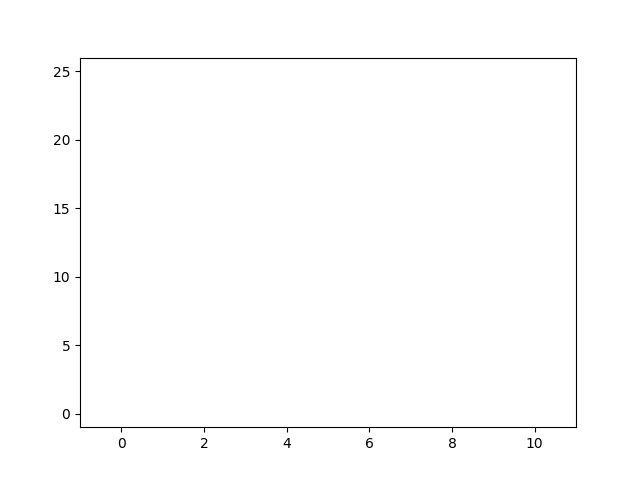

In [9]:
# графическое окно, в котором в дальнейшем будет осуществляться анимация
fig1 = plt.figure()
# cоздам графическую область и задам для нее пределы по осям
y_min, y_max = np.min(y_array), np.max(y_array)
# графическая область
ax1 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

In [10]:
# с помощью функции plot из пакета pyplot создам в графической области ax1 графический объект 
# типа Line2D черного цвета, координаты которого пока не определены
# почему тут запятая?
line1, = ax1.plot([], [], 'k')
type(line1)

matplotlib.lines.Line2D

Определим пользовательскую функцию одного аргумента $\textbf{at_frame1}$, которая будет вызываться в каждом кадре анимации.

Аргумент функции at_frame1 является массивом из $x$-ой и $y$-ой уоординат точки графика функции. Функция at_frame1 добавляет к графическому объекту line1 точку с координатами $\left( x, y\right)$.

In [11]:
def at_frame1(t):
    """добавляет к объекту line1 точку с координатами (t[0], t[1])
    
    Arguments:
    
    t: последовательность из двух элементов
    
    Returns: None
    """
    x_coord = list(line1.get_xdata())
    y_coord = list(line1.get_ydata())
    
    x_coord.append(t[0])
    y_coord.append(t[1])
    
    line1.set_data(x_coord, y_coord)    
    return None

In [12]:
help(at_frame1)

Help on function at_frame1 in module __main__:

at_frame1(t)
    добавляет к объекту line1 точку с координатами (t[0], t[1])
    
    Arguments:
    
    t: последовательность из двух элементов
    
    Returns: None



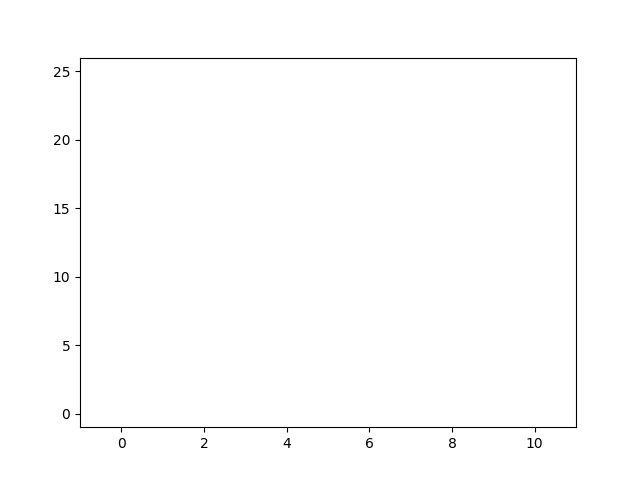

In [15]:
# для построения анимации полагаем необязательный аргумент frames для функции 
# FuncAnimation следующим образом frames = matrix
# это означает, что количество кадров анимации будет совпадать с 
# количеством строк матрицы matrix
# при этом для каждого кадра анимации будет вызываться функция at_frame1 
# со значением аргумента, равным массиву со значениями текущей строки матрицы matrix

# вызов функций figure, axes, plot, необходимых для анимации, а также 
# вызов функции FuncAnimation должны располагаться в одной ячейке кода

fig1 = plt.figure()
ax1 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

line1, = ax1.plot([], [], 'k')
FuncAnimation(fig1, at_frame1, frames = matrix, repeat = False, interval = 100)

In [16]:
# мое задание
import math
f = lambda x: math.cos(x) * x ** 3
# задаю переменные
my_x_min = 2.; my_x_max = 7.; my_step = 0.02

In [17]:
my_x_array = np.arange(my_x_min, my_x_max, my_step)
my_y_array = np.array([f(x) for x in my_x_array])
my_y_min = np.min(my_y_array); my_y_max = np.max(my_y_array)

In [18]:
my_matrix = np.transpose(np.array([my_x_array, my_y_array]))

In [19]:
def anim(i):
    """добавляет к объекту line1 точку с координатами (t[0], t[1])
    
    Arguments :
    
    t : последовательность из двух элементов
    
    Returns : None
    """
    my_x_coord = list(my_line.get_xdata())
    my_y_coord = list(my_line.get_ydata())
    
    my_x_coord.append(i[0])
    my_y_coord.append(i[1])
    
    my_line.set_data(my_x_coord, my_y_coord)    
    return None

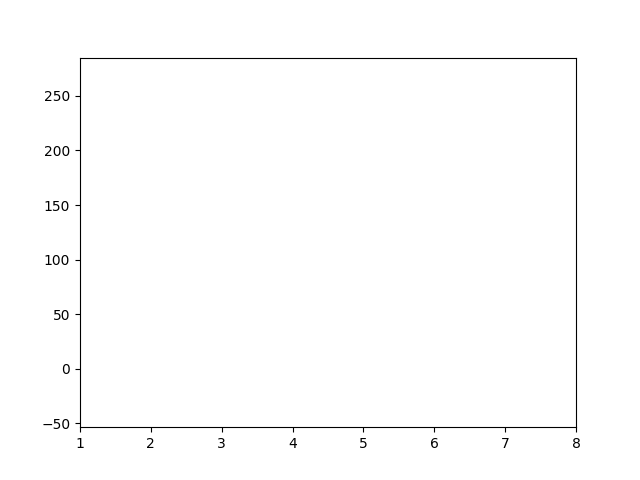

In [21]:
my_fig = plt.figure()
my_ax = plt.axes()
# не понимаю, почему этот график не хочет считаться с y
# я понял, у меня слишком большой масштаб)
plt.axis([my_x_min - 1, my_x_max + 1, my_y_min - 10, my_y_max + 10])

my_line, = my_ax.plot([], [], 'y--')
FuncAnimation(my_fig, anim, frames = my_matrix, repeat = False, interval = 20)

# Задание 3.2 (Анимация движения точки по графику функции)

Пусть аналитический вид функции $y = y \left( x \right)$ и значения переменны $x_{min}$, $x{max}$, $step$ задаются такими же, как и при выполнении задания $3.1$, согласно Вашему варианту.

$\color{red}{Создайте}$ $\color{red}{анимацию}$ движения точки по графику явно заданной аналитической функции $y = y \left( x \right)$ по значениям $x$, последовательно изменяющимся от $x_{min}$ до $x{max}$ с шагом $step$.

# Реализация задания 3.2

Последовательно выполним следущие шаги с использованием функций из модуля pyplot:

1. с помощью функции $\textbf{figure}$ создадим графическое окно, в котором в дальнейшем будет осуществляться анимация
2. с помощью функции $\textbf{axes}$ cоздадим графическую область и зададим для нее пределы по осям
3. с помощью функции $\textbf{plot}$ создадим в графической области графический объект типа Line2D черного цвета, координаты которого описывают аналитическую функцию
4. с помощью функции $\textbf{plot}$ создадим в графической области графический объект типа Line2D красного цвета с маркером в виде кружка, координаты которого пока неизвестны

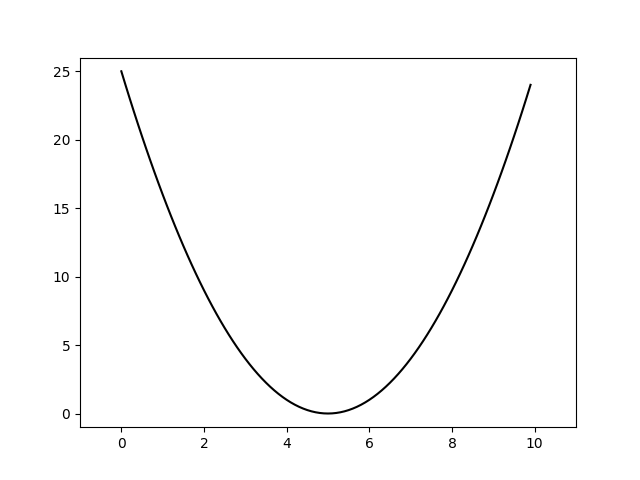

In [22]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

line1, = ax2.plot(x_array, y_array, 'k') # отображение графика функции
line2, = ax2.plot([], [], 'ro')

Определим пользовательскую функцию одного аргумента $\textbf{at_frame2}$, которая будет вызываться в каждом кадре анимации.

Аргумент функции $\textbf{at_frame2}$ является массивом из $x$-ой и $y$-ой координат точки графика функции. Функция at_frame2 задает графический объект line2 единственной точкой с координатами $\left( x, y \right)$

In [23]:
def at_frame2(t):
    """задает объект line2 точкой с координатами (t[0], t[1])
    
    Arguments:
    
    t: последовательность из двух элементов
    
    Returns: None
    """
    line2.set_data(t)
    return None

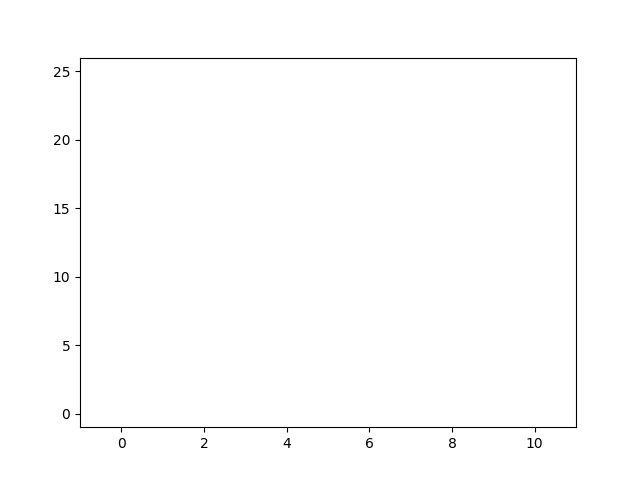

In [26]:
# полагаем необязательный аргумент init_func равным пользовательской функции init, 
# init_func = init, которая будет вызываться перед началом анимации

fig2 = plt.figure()
ax2 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

def init():
    """создает начальное состояние графической области перед началом анимации и возвращает None"""
    global line2 # сделана глобальной, чтобы переменная line2 была видна в функции at_frame2
    line1, = ax2.plot(x_array, y_array,'k')  # отображение графика функции
    line2, = ax2.plot([], [],'ro') # отображение точки
    plt.legend(['$y(x) = (x-5)^2$','Мovable point'])
    return None

FuncAnimation(fig2, at_frame2, frames = matrix, init_func = init, repeat = False, interval = 20)

In [27]:
# мое задание
# возьму новый график
# _3_2 как номер задания, так как не хочу менять уже занятые переменные, они могут использоваться в следующем задании
x_min_3_2 = 2.; x_max_3_2 = 7.; step = 0.02
x_array_3_2 = np.arange(x_min_3_2, x_max_3_2, step)

In [28]:
g = lambda x: math.sin(10 * x) - x

In [29]:
y_array_3_2 = np.array([g(x) for x in x_array_3_2])

y_min_3_2 = np.min(y_array_3_2)
y_max_3_2 = np.max(y_array_3_2)

In [30]:
matrix_3_2 = np.transpose(np.array([x_array_3_2, y_array_3_2]))

In [31]:
def at_frame_line_3_2(i):
    """добавляет к объекту line1 точку с координатами (t[0], t[1])
    
    Arguments:
    
    t: последовательность из двух элементов
    
    Returns: None
    """
    x_coord_3_2 = list(line_3_2.get_xdata())
    y_coord_3_2 = list(line_3_2.get_ydata())
    
    x_coord_3_2.append(i[0])
    y_coord_3_2.append(i[1])
    
    line_3_2.set_data(x_coord_3_2, y_coord_3_2)
    
    return None

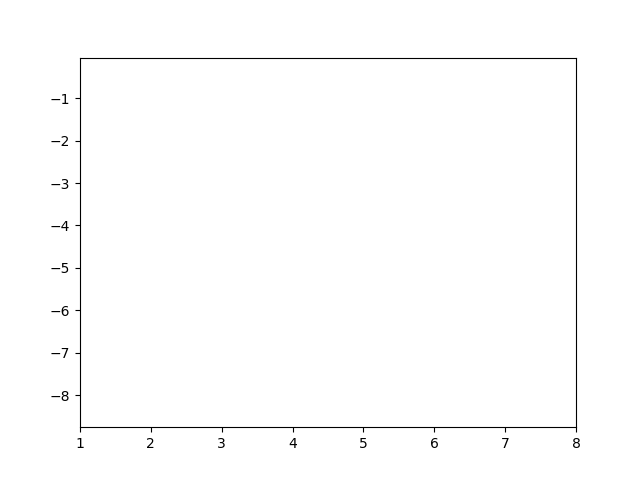

In [32]:
fig_3_2 = plt.figure()
ax_3_2 = plt.axes()
plt.axis([x_min_3_2 - 1, x_max_3_2 + 1, y_min_3_2 - 1, y_max_3_2 + 1])

line_3_2, = ax_3_2.plot([], [], 'y--')

FuncAnimation(fig_3_2, at_frame_line_3_2, frames = matrix_3_2, repeat = False, interval = 20)

In [33]:
# добавлю функцию отображения точки, которая будет вызываться в каждом кадре
def at_frame_point_3_2(i):
    """задает объект point_3_2 точкой с координатами (t[0], t[1])
    
    Arguments:
    
    t: последовательность из двух элементов
    
    Returns: None
    """
    point_3_2.set_data(i)
    return None

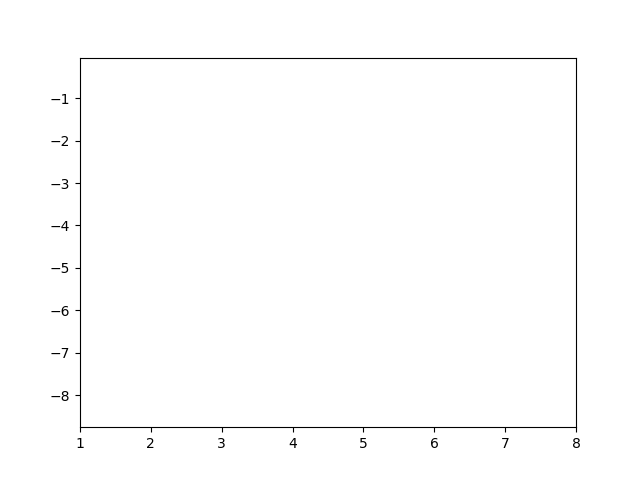

In [34]:
fig_3_2_new = plt.figure()
ax_3_2_new = plt.axes()
plt.axis([x_min_3_2 - 1, x_max_3_2 + 1, y_min_3_2 - 1, y_max_3_2 + 1])

def init_3_2():
    """создает начальное состояние графической области перед началом анимации и возвращает None"""
    # я же могу до этого объявить свои линии и точку, не обязательно же линию делать глобальной переменной
    global point_3_2 # сделана глобальной, чтобы переменная line_3_2_new была видна в функцииpoint_3_2
    # неужели это так работает?
    # я думал, что просто созданная переменная, передается в функцию в качестве аргумента
    # но тут все сложнее, я же не передаю точку никуда, она просто создается и с ней работает FuncAnimation
    line_3_2_new, = ax_3_2_new.plot(x_array_3_2, y_array_3_2, 'y--') # отображение графика функции
    point_3_2, = ax_3_2_new.plot([], [], 'ro') # отображение точки
    plt.legend(['sin(10 * x) - x', 'Movable point'])
    return None

FuncAnimation(fig_3_2_new, at_frame_point_3_2, frames = matrix_3_2, init_func = init_3_2, repeat = False, interval = 20)

In [35]:
# хочу попробовать сделать так, чтобы точка описывала траектрию
# может быть есть более элегантный способ, например, вызывать в этой функции две другие
# для прямой и для точки, а не пихать все сразу в одну
def at_frame_line_and_point_3_2(i):
    """задает объект point_3_2_tr точкой с координатами (t[0], t[1])
    добавляет к объекту line_3_2_tr точку с координатами (t[0], t[1])
    
    Arguments:
    
    t: последовательность из двух элементов
    
    Returns: None
    """
    
    x_coord_3_2_tr = list(line_3_2_tr.get_xdata())
    y_coord_3_2_tr = list(line_3_2_tr.get_ydata())
    
    x_coord_3_2_tr.append(i[0])
    y_coord_3_2_tr.append(i[1])
    
    line_3_2_tr.set_data(x_coord_3_2_tr, y_coord_3_2_tr)
    
    point_3_2_tr.set_data(i)
    
    return None

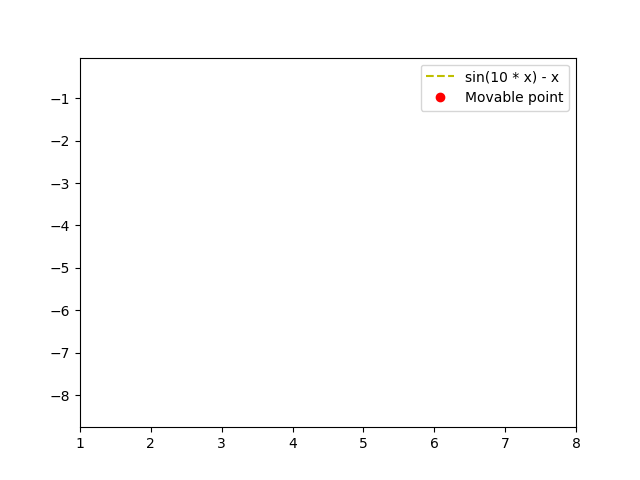

In [36]:
fig_3_2_tr = plt.figure()
ax_3_2_tr = plt.axes()
plt.axis([x_min_3_2 - 1, x_max_3_2 + 1, y_min_3_2 - 1, y_max_3_2 + 1])

line_3_2_tr, = ax_3_2_tr.plot([], [], 'y--')
point_3_2_tr, = ax_3_2_tr.plot([], [], 'ro')

plt.legend(['sin(10 * x) - x', 'Movable point'])

FuncAnimation(fig_3_2_tr, at_frame_line_and_point_3_2, frames = matrix_3_2, repeat = False, interval = 20)

# Задание 3.3 (Aнимация движения секущей прямой к заданной кривой)

Кривая задана графиком аналитической функции $y = y \left( x \right)$ для $x \in \left[ x_{min}, x_{max} \right]$ из Задания 3.1, согласно Вашему варианту. Начальная точка $A$ с координатами $\left( x_{min}, y \left( x_{min} \right) \right)$ является неподвижной точкой. Подвижная точка $B$ движется последовательно по кривой от конечной точки кривой с координатами $\left( x_{max}, y \left( x_{max} \right) \right)$ к неподвижной точке $A$.

$\color{red}{Создайте}$ $\color{red}{анимацию}$ движения секущей прямой проходящей через точки $A$ и $B$ до момента совпадения координат точек $A$ и $B$, когда секущая прямая становится касательной прямой к заданной кривой в точке $A$.

# Реализация задания 3.3

Перед началом анимации графическая область должна содержать следующие графические объекты:
- график заданной функции, которая определяет траекторию движения подвижной точки $B$
- неподвижную точку $A$
- начальное положение подвижной точки $B$
- cекущую прямую, проходящую через точки $A$ и $B$

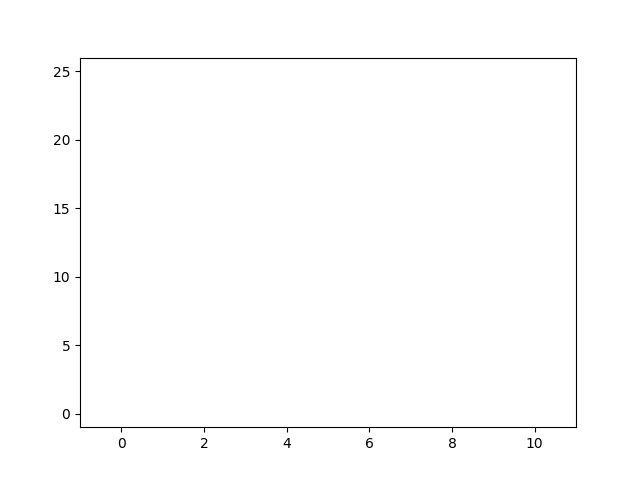

In [48]:
# начальное состояние графической области реализуем с помощью пользовательской функции init, 
# которая будет передана в качестве значения аргумента init_func функции FuncAnimation, init_func = init
fig3 = plt.figure()
ax3 = plt.axes()
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

def init():
    """cоздает начальное состояние графической области перед началом анимации и возвращает None"""
    global point_B, secant_line, A # сделаны глобальными, чтобы были видна в функции at_frame3
    curve, = ax3.plot(x_array, y_array,'k') # график функции
    
    A = np.array([x_array[0], y_array[0]])
    point_A = ax3.plot(A[0], A[1], 'bo') #неподвижная точка
    
    B = np.array([x_array[-1], y_array[-1]])
    point_B, = ax3.plot(B[0], B[1], 'ro') # подвижная точка
    
    # не понимаю, почему использовался именно такой способ построения точек секущей
    secant_p = [A + (B - A) * t for t in [-2, 2]] # уравнение прямой, проходящей через точки A и В 
    # я изменил код и сделал так
    # иначе, мне кажется, задание не выполнить, в чем я не прав
    secant_p = np.array(secant_p)
    secant_line, = ax3.plot(secant_p[:,0], secant_p[:,1], 'g') # секущая прямая
    
    plt.legend(['$y(x) = (x-5)^2$', 'Unmovable point A', 'Мovable point B', 'Secant line through A and B'])
    
    return None

def at_frame3(t):
    """do ... 
     
    Arguments :
    
    t : массив из двух элементов
    
    Returns : None
    """
    
    """задает объект point_3_2_tr точкой с координатами (t[0], t[1])
    добавляет к объекту line_3_2_tr точку с координатами (t[0], t[1])
    
    Arguments:
    
    t: последовательность из двух элементов
    
    Returns: None
    """
    C = np.array([t[0], t[1]])
    new_secant_p = [A + (C - A) * t for t in [-10, 10]]
    new_secant_p = np.array(new_secant_p)
    
    secant_line.set_data(new_secant_p[:,0], new_secant_p[:,1])
    
    point_B.set_data(t)
    
    return None
    
FuncAnimation(fig3, at_frame3, frames = matrix[::-1], init_func = init, repeat = False, interval = 20)